In [69]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import csv



In [62]:
# Pull Data

income = pd.read_csv("Census_Household_Income_Block_Groups.csv")
income_df = pd.DataFrame(income)       
        
income_df

commuter = pd.read_csv("Census_Commuting_Block_Groups.csv")
commuter_df = pd.DataFrame(commuter)
    
charlotte_df = pd.merge(income_df, commuter_df, how="left", on=["GEOID10"])
charlotte_df=charlotte_df.set_index(charlotte_df["GEOID10"])
#charlotte_df.head()

del charlotte_df['OBJECTID_x']
del charlotte_df['OBJECTID_y']
del charlotte_df['STATEFP10_x']
del charlotte_df['STATEFP10_y']
del charlotte_df['COUNTYFP10_x']
del charlotte_df['COUNTYFP10_y']
del charlotte_df['TRACTCE10_x']
del charlotte_df['TRACTCE10_y']
del charlotte_df['BLKGRPCE10_x']
del charlotte_df['BLKGRPCE10_y']
del charlotte_df['GEOID10']
del charlotte_df['NAMELSAD10_x']
del charlotte_df['NAMELSAD10_y']
del charlotte_df['LOGRECNO_x']
del charlotte_df['LOGRECNO_y']
del charlotte_df['geoname_x']
del charlotte_df['geoname_y']
del charlotte_df['SHAPESTArea_y']
del charlotte_df['SHAPESTArea_x']
del charlotte_df['SHAPESTLength_y']
del charlotte_df['SHAPESTLength_x']

charlotte_df.head()

,Total_Households,Less_than_10000,i10000_to_14999,i15000_to19999,i20000_to_24999,i25000_to_29999,i30000_to_34999,i35000_to_39999,i40000_to_44999,i45000_to_49999,...,FamiliesInPoverty,FamilyPovertyRate,Workers_16_and_older,Drove_alone,Carpool,Public_Transportation,Walked,Other_Means,Non_SOV_Commuters,Pct_Non_SOV_Commuters
GEOID10,,,,,,,,,,,,,,,,,,,,,
371190016092,982,110,39,49,105,75,43,42,20,68,...,105,0.202703,1147,846,476,23,14,26,539,0.469922
371190031091,1088,38,35,78,120,105,102,67,76,57,...,109,0.189565,1568,1062,516,192,34,22,764,0.487245
371190064052,943,20,46,59,11,11,30,66,26,21,...,0,0.000000,892,794,150,7,11,5,173,0.193946
371190027021,803,13,13,0,37,12,65,0,10,18,...,13,0.023593,950,806,60,42,72,0,174,0.183158
371190030131,1124,49,15,0,23,0,15,61,71,43,...,56,0.066116,1211,944,534,0,0,0,534,0.440958


In [63]:
# Combine income groups
#0-50k
less_10k = charlotte_df["Less_than_10000"].values
tenk_fift = charlotte_df["i10000_to_14999"].values
fift_ninet = charlotte_df["i15000_to19999"].values
twenty_twenty5=charlotte_df["i20000_to_24999"].values
twenty5_thirty=charlotte_df["i25000_to_29999"].values
thirty_thirty5=charlotte_df["i30000_to_34999"].values
thirty5_forty=charlotte_df["i35000_to_39999"].values
forty_forty5=charlotte_df["i40000_to_44999"].values
forty5_fifty=charlotte_df["i45000_to_49999"].values

zero_fifty=less_10k+tenk_fift+fift_ninet+twenty_twenty5+twenty5_thirty+thirty_thirty5+thirty5_forty+forty_forty5+forty5_fifty

#50k-100k
fifty_sixty=charlotte_df["i50000_to_59999"].values
sixty_seventy5=charlotte_df["i60000_to_74999"].values
seventy5_onehund=charlotte_df["i75000_to_99999"].values

fifty_onehund=fifty_sixty+sixty_seventy5+seventy5_onehund

#100k-150k
onehund_one25=charlotte_df["i100000_to_124999"].values
one25_one50=charlotte_df["i125000_to_149999"].values
one50_two=charlotte_df["i150000_to_199999"].values

onehund_two=onehund_one25+one25_one50+one50_two


#zero_fifty
#fifty_onehund
#onehund_two



In [64]:
# Create new DataFrame
del charlotte_df['Less_than_10000']
del charlotte_df['i10000_to_14999']
del charlotte_df['i15000_to19999']
del charlotte_df['i20000_to_24999']
del charlotte_df['i25000_to_29999']
del charlotte_df['i30000_to_34999']
del charlotte_df['i35000_to_39999']
del charlotte_df['i40000_to_44999']
del charlotte_df['i45000_to_49999']
del charlotte_df['i50000_to_59999']
del charlotte_df['i60000_to_74999']
del charlotte_df['i75000_to_99999']
del charlotte_df['i100000_to_124999']
del charlotte_df['i125000_to_149999']
del charlotte_df['i150000_to_199999']

charlotte_df["0-50k"]=zero_fifty
charlotte_df["50k-100k"]=fifty_onehund
charlotte_df["100k-200k"]=onehund_two


clean_charlotte=charlotte_df[["0-50k", "50k-100k", "100k-200k", "i200000_or_more", "Median_Household_Income",
                "FamiliesInPoverty", "FamilyPovertyRate", "TotalFamilies", "Total_Households",
                "Workers_16_and_older", "Drove_alone", "Carpool", "Public_Transportation",
                "Walked", "Other_Means", "Non_SOV_Commuters", "Pct_Non_SOV_Commuters"]]

clean_charlotte.head()


,0-50k,50k-100k,100k-200k,i200000_or_more,Median_Household_Income,FamiliesInPoverty,FamilyPovertyRate,TotalFamilies,Total_Households,Workers_16_and_older,Drove_alone,Carpool,Public_Transportation,Walked,Other_Means,Non_SOV_Commuters,Pct_Non_SOV_Commuters
GEOID10,,,,,,,,,,,,,,,,,
371190016092,551,322,109,0,45526.0,105,0.202703,518,982,1147,846,476,23,14,26,539,0.469922
371190031091,678,357,43,10,39924.0,109,0.189565,575,1088,1568,1062,516,192,34,22,764,0.487245
371190064052,290,226,282,145,86250.0,0,0.000000,483,943,892,794,150,7,11,5,173,0.193946
371190027021,168,152,174,309,136995.0,13,0.023593,551,803,950,806,60,42,72,0,174,0.183158
371190030131,277,138,335,374,134286.0,56,0.066116,847,1124,1211,944,534,0,0,0,534,0.440958


Text(0.5, 1.0, 'Median Household Income vs Families in Poverty')

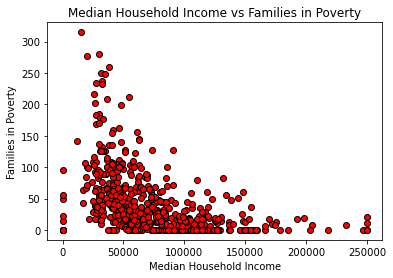

In [75]:
x_axis=clean_charlotte["Median_Household_Income"]
y_axis=clean_charlotte["FamiliesInPoverty"]

plt.scatter(x_axis,y_axis, color="black", facecolor="red")
plt.xlabel("Median Household Income")
plt.ylabel("Families in Poverty")
plt.title("Median Household Income vs Families in Poverty")

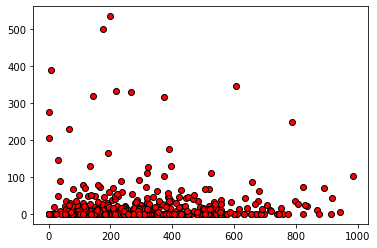

In [76]:
x_axis1=clean_charlotte["0-50k"]
y_axis1=clean_charlotte["Walked"]

plt.scatter(x_axis1,y_axis1, color="black", facecolor="red")